In [38]:
# basics
import numpy as np
import pandas as pd
import geopandas as gpd
import missingno as msno
import matplotlib.pyplot as plt
import time

#plotly
import plotly.graph_objs as go 
import plotly.express as px

# Cleaning

In [10]:
jan1 = pd.read_csv('./20200101trim.csv')
feb1 = pd.read_csv('./20200201trim.csv')
mar1 = pd.read_csv('./20200301trim.csv')
apr1 = pd.read_csv('./20200401trim.csv')
may5 = pd.read_csv('./20200505trim.csv')

In [27]:
jan1['month'] = 1
feb1['month'] = 2
mar1['month'] = 3
apr1['month'] = 4
may5['month'] = 5

In [59]:
df = pd.concat([jan1, feb1, mar1, apr1, may5])

In [60]:
df.drop(columns='Unnamed: 0', inplace=True)

In [61]:
df.head(2)

0         1       2     3          4    5       6    7    8    9  \
0  896047517  20190101  201901  2019  2019.0027  NaN     NaN  NaN  NaN  NaN   
1  896047518  20190101  201901  2019  2019.0027  CAN  CANADA  CAN  NaN  NaN   

   ... 49                                 50  51    52       53       54  \
0  ...  2            Kentucky, United States  US  USKY  37.6690 -84.6514   
1  ...  4  Thousand Islands, Ontario, Canada  CA  CA08  44.3333 -76.0000   

        55        56                                                 57 month  
0       KY  20200101  https://www.whas11.com/article/news/local/man-...     1  
1  -574764  20200101  https://www.recorder.ca/news/local-news/februa...     1  

[2 rows x 59 columns]

In [31]:
colin_columns = ['serial_no','weird_date','weird_month','weird_year', 'unknown01', # A-E serial No. and strange dates. website metadata?
              'keyword_code01','keyword01','country_code01','unknown02', # F-I first keyword and abbreviations
              'empty01', 'empty02','empty03', # J-L mostly empty
              'keyword_code02','unknown03', 'empty05', # M-O abbreviations
              'keyword_code03','keyword02','country_code02','unknown04', # P-S second keyword
              'empty06','empty07','empty08','keyword_code03','empty09', 'empty10', # T-Y mostly empty
              'unknown05','unknown06','unknown07','unknown08','unknown09','unknown10','unknown11','unknown12','unknown13', # many unknowns
              'tone','unknown15', # Average Tone
              'location01','country_code03','country_code04', # location in words
              'latitude01','longitude02','mix_loc', # lat and long
              'unknown16','location02','country_code05','country_code06', # location again
              'latitude02','longitude02','unknown17', # lat and long again
              'unknown18','location03','country_code07','country_code08', # location third time
              'latitude03','longitude03','unknown18', # lat and long third time
              'date','url','month' # date and url
               ]

In [62]:
df.columns = colin_columns

In [33]:
data.head(2)

serial_no  weird_date  weird_month  weird_year  unknown01 keyword_code01  \
0  896047517    20190101       201901        2019  2019.0027            NaN   
1  896047518    20190101       201901        2019  2019.0027            CAN   

  keyword01 country_code01 unknown02 empty01  ... unknown18  \
0       NaN            NaN       NaN     NaN  ...         2   
1    CANADA            CAN       NaN     NaN  ...         4   

                          location03 country_code07 country_code08 latitude03  \
0            Kentucky, United States             US           USKY    37.6690   
1  Thousand Islands, Ontario, Canada             CA           CA08    44.3333   

  longitude03 unknown18      date  \
0    -84.6514        KY  20200101   
1    -76.0000   -574764  20200101   

                                                 url month  
0  https://www.whas11.com/article/news/local/man-...     1  
1  https://www.recorder.ca/news/local-news/februa...     1  

[2 rows x 59 columns]

In [81]:
df.head()

serial_no  weird_date  weird_month  weird_year  unknown01 keyword_code01  \
0  896047517    20190101       201901        2019  2019.0027            NaN   
1  896047518    20190101       201901        2019  2019.0027            CAN   
2  896047519    20190101       201901        2019  2019.0027            CVL   
3  896047520    20190101       201901        2019  2019.0027            CYP   
4  896047521    20190101       201901        2019  2019.0027            ETH   

  keyword01 country_code01 unknown02 empty01  ... unknown18  \
0       NaN            NaN       NaN     NaN  ...         2   
1    CANADA            CAN       NaN     NaN  ...         4   
2   TOURIST            NaN       NaN     NaN  ...         4   
3    CYPRUS            CYP       NaN     NaN  ...         4   
4  ETHIOPIA            ETH       NaN     NaN  ...         1   

                                   location03 country_code07 country_code08  \
0                     Kentucky, United States             US           USKY   
1           Thousand Islands, Ontario, Canada             CA           CA08   
2          Sydney, New South Wales, Australia             AS           AS02   
3  Aylesbury, Buckinghamshire, United Kingdom             UK           UKB9   
4                                    Ethiopia             ET             ET   

  latitude03 longitude03 unknown18      date  \
0    37.6690    -84.6514        KY  20200101   
1    44.3333    -76.0000   -574764  20200101   
2   -33.8833    151.2170  -1603135  20200101   
3    51.8167     -0.8000  -2588872  20200101   
4     8.0000     38.0000        ET  20200101   

                                                 url month  
0  https://www.whas11.com/article/news/local/man-...     1  
1  https://www.recorder.ca/news/local-news/februa...     1  
2  https://www.smh.com.au/world/europe/not-made-f...     1  
3  https://www.dailymail.co.uk/debate/article-784...     1  
4  https://timesofindia.indiatimes.com/blogs/extr...     1  

[5 rows x 59 columns]

Histograms

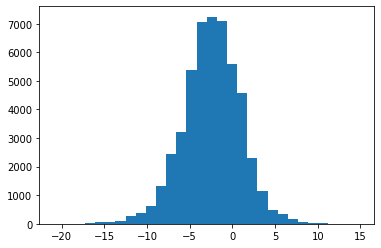

In [63]:
plt.hist(df['tone'], bins=30);

In [64]:
np.mean(df['tone'])

-2.3992808304481916

Set up Tones

In [69]:
tones = df['tone'].groupby(df['month']).agg(['mean', 'median', 'max', 'min', 'count'])
tones['month'] = [1,2,3,4,5]

In [70]:
tones

mean    median        max        min  count  month
month                                                        
1     -3.006121 -3.281250  13.157895 -17.368421  10000      1
2     -2.530061 -2.496715  13.513514 -20.821878  10000      2
3     -1.972756 -2.080624  13.157895 -18.970329  10000      3
4     -2.197281 -1.998878  12.406015 -17.142857  10000      4
5     -2.290185 -2.101290  14.822547 -16.788321  10000      5

# Overall Plotly Histogram

In [80]:
data = go.Histogram(x=df['tone'])
layout = go.Layout(title='Distribution of Tone in Shortage Articles', 
                   xaxis=dict(title='Tone'), 
                   yaxis=dict(title='Count')) 
fig = go.Figure(data=data, layout=layout) 
fig.show()

In [88]:
# Same thing using plotly express
fig = px.histogram(df, x='tone')
fig.show()

In [83]:
# slider adapted from: https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu
data_slider = []

for date in df.month.unique():
    df_subset = df[df['month'] == date]
#     for col in df_subset.columns:
#         df_subset[]
    each_date = dict(z=df_subset['tone'])
    data_slider.append(each_date)

In [86]:
# data_slider

In [ ]:
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
               args=['visible', [False] * len(data_slider)],
               )
    
    steps.append(step)

# Histogram by Month

In [95]:
fig = px.histogram(df, 
                   x="tone",
                   title='Histogram of Tone by Month',
                   labels={'tone':'Tone'},
                   animation_frame="month")
fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

# Time Series of Tone

In [75]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tones.month, y=tones['mean'], name='Mean'))
fig.add_trace(go.Scatter(x=tones.month, y=tones['median'], name='Median'))
fig.add_trace(go.Scatter(x=tones.month, y=tones['max'], name='Maximum'))
fig.add_trace(go.Scatter(x=tones.month, y=tones['min'], name='Minimum'))
fig.add_trace(go.Scatter(x=tones.month, y=tones['count']/10000, name='Count(tens of thousands)'))
fig.update_layout(title_text='Average Tone and Count of Shortage Occurrences in 2020',
                  xaxis=dict(title='Month'),
                  yaxis=dict(title='Tone: Low to High'),
                 xaxis_rangeslider_visible=True)
fig.show()